In [43]:
# 라이브러리 로드
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import re
import pickle

In [2]:
# 데이터셋 로드
root_dir = "data"

df = pd.read_parquet(f"{root_dir}/all_append_csv_12_26_1200i.gzip")
display(df.head())
df.shape

,제목,가사,장르
0,무지개 (Rainbow) (Feat. 조용휘),동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...,뮤지컬
1,나 주는 줄 알고 손 내밀었잖아,넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...,뮤지컬
2,너와나,이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...,뮤지컬
3,나만의 언어 rep.,"(좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...",뮤지컬
4,여기는 엄마 컴퍼니,어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...,뮤지컬


(109186, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109186 entries, 0 to 109185
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   제목      109185 non-null  object  
 1   가사      109186 non-null  object  
 2   장르      109186 non-null  category
dtypes: category(1), object(2)
memory usage: 1.8+ MB


In [4]:
# 중복행 한 번 더 확인
df = df.drop_duplicates()
df.shape

(109186, 3)

In [5]:
# 기본 전처리
df["가사"] = df["가사"].map(lambda x : re.sub("[^ㄱ-ㅎ가-힣0-9\n ]", "", x).strip()) # 한글 자음, 한글, 숫자, 개행문자만 남기고 제거
df["가사"] = df["가사"].map(lambda x : re.sub("\s{2,}", "", x)) # 공백 2회 이상 제거
df = df[df["가사"].map(lambda x : len(x) > 10)] # 전처리 후 빈 행이나 10자 이상이 안되는 데이터 제거
df = df.reset_index(drop=True) # 인덱스 초기화
df.shape

(105744, 3)

In [6]:
# 장르별 개행문자를 포함하지 않은 곡 개수
df.loc[~df["가사"].str.contains("\n"), "장르"].value_counts()

발라드      602
록메탈      412
댄스       249
트로트      196
RNB      163
포크블루스    159
힙합        98
동요        76
뮤지컬       12
Name: 장르, dtype: int64

In [7]:
# 개행문자 없는 데이터 제거
df = df[df["가사"].str.contains("\n")]
df.shape

(103777, 3)

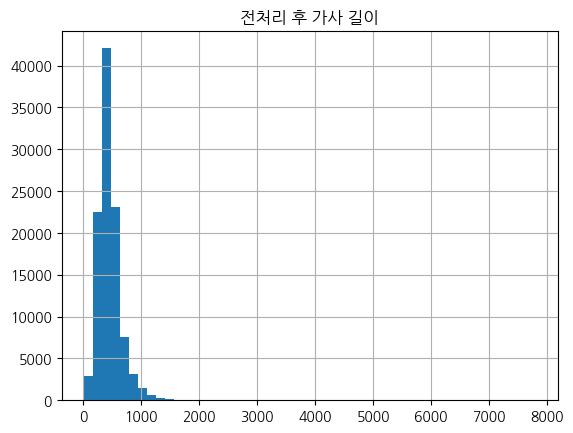

In [8]:
# 전처리 후 가사 길이
df["가사"].str.len().hist(bins=50).set_title("전처리 후 가사 길이");

In [9]:
df.loc[df["가사"].str.contains("간주"), "가사"]

413       땅속에 꽃씨가 잠을 깨나 봐\n들마다 언덕마다 파란 숨결 소리에\n포시시 눈을 뜨는...
414       높고 높은 하늘이라 말들 하지만\n나는 나는 높은 게 또 하나 있지\n낳으시고 기르...
416       방울새야 방울새야 쪼로롱 방울새야\n간밤에 고방울 어디서 사왔니\n쪼로롱 고방울 어...
417       아랫집 윗집 사이에 울타리는 있지만\n기쁜 일 슬픈 일 모두 내 일처럼 여기고\n서...
419       노래는 즐겁다\n지저귀는 멧새처럼\n비배쫑 비배쫑\n비배쫑 배쫑배쫑\n노래를 부르면...
                                ...                        
105431    우리 사랑하고 헤어질 줄 정말 몰랐죠\n너무 차가워진 니 모습 미워요\n다른 누군가...
105655    집에 돌아오던 해 질 무렵 거리에\n노란 불빛 아래 놓인\n예쁜 밀짚모자\n만화 속...
105706    의 라디오 쑈쑈쑈\n오늘 채택된 사연은\n경기도 여주군\n여주우체국 사서함 7호\n...
105707    바람아 불어라 메마른 가슴에\n불 같은 세월의 상처를 데려가\n세상에 가득한 아픔도...
105738    내방엔 유리병하나\n끝없이 술렁이는\n창문틈 커튼사이로\n꽃바람 살랑이며 옵시네\n...
Name: 가사, Length: 97, dtype: object

In [10]:
df.loc[df["가사"].str.contains('1절'), "가사"]

4317     노래는 흐르고\n우리는 멈출 줄 몰랐지\n영원을 말했고 우리는 약속을 했지\n흐르는...
24843    설레는 불금 물량은 폭발\n내 손은 이리저리\n조각글을 뒤진다\n방장은 소령 담당은...
24964    설레는 불금 물량은 폭발\n내 손은 이리저리 조각글을 뒤진다\n방장은 소령 담당은 ...
28852    제1절\n모두들 잠드는 고요한 이밤에\n어이해 나홀로 잠못이루나\n넘기는 책속에 수...
31371    1절\n엄마가 섬그늘에 굴따러가면\n아기는 혼자남아 집을 보다가\n바다가 불러주는 ...
34329    난 분명 짜장면을 시켰는데\n짬뽕이 왔을 때\n오히려 좋아\n500원 더 비싸 오히...
34554    난 분명 짜장면을 시켰는데\n짬뽕이 왔을 때\n오히려 좋아\n500원 더 비싸 오히...
36167    너무 빨리 지나는 시간은\n야속하게도 기다리지 않아\n남기지 말자 아쉬움이란 거\n...
36468    모두 그에게 말해 또 왔네\n새꺄죽지 않고 왔다 이렇게\n새꺄 뭐의\n라인을 빌릴래...
37166    맨발로 올라왔지 발엔 굳은살이 배겨\n이제 안 해도 돼 배려넌 내 실팰 점쳤지만\n...
39503    어른이 되면\n내 안의 어린아인 어딘가\n떠나간 채로\n가면을 쓰고 살아야 하니까\...
39767    난 정상수 부산을 대표해\n이 게임의 승자는\n정해져 있어 애초에나는 정상수 부산을...
40327    벌써 12시\n아직 집으로 들어가\n긴 이른 시간이라\n작업실로 돌아와\n마신 소주...
44765    우리 집에 음악 들으러 갈래\n아님 귀여운 강아지 보러 갈래\n다른 뜻은 없어 단지...
53125    1절\n밥 먹었니 라고 말하고 싶지만 그럴 수가 없어 이젠\n어떻게 할지 생각해 봤...
55600    너도 나와 같기를1절그래 알고 있어 이제 우린\n이미 엎질러진 잔이 된걸\n빈잔처럼...
57781    한국형 발라드는\n1절에서 드럼이\n나오진 않지만\n난 한 번 넣어 볼게\n다시로\.

In [11]:
# 발라드만 떼오기
df_ballad = df[df["장르"] == "발라드"]
df_ballad.shape

(43818, 3)

In [45]:
df_ballad.loc[df_ballad["가사"].str.contains("간주"), "가사"][13463]

'2파리에 도착했네\n어딜 갈까 뭘 보게 될까\n샹젤리제를 걷고\n한 손엔 바게트\n자전거 타고서 에펠탑을 지나\n파리에 도착했네\n어딜 갈까 뭘 먹게 될까\n어디선가 들리는 음악소리\n퐁네프 다리 위에 예술가들\n기타 아코디언이 들려오고\n음악 소리가 날 춤추게 하네파리 날 꿈꾸게 해 파리가 날 꿈꾸게 하네\n파리 날 꿈꾸게 해 파리가 내 꿈 나의 모험간주파리에 도착했네\n거리 위에 연인들이 있네\n나는 왜 혼자만 남아있는 걸까\n퐁네프 다리 위에 예술가들\n기타 아코디언이 들려오고\n음악 소리가 날 춤추게 하네'

In [29]:
df_ballad.loc[df_ballad["가사"].str.contains('1절'), "가사"]

Series([], Name: 가사, dtype: object)

In [15]:
# 필요 없는 단어 제거
df_ballad["가사"] = df_ballad["가사"].map(lambda x : re.sub("1절", "", x))
df_ballad["가사"] = df_ballad["가사"].map(lambda x : re.sub("2절", "", x))
df_ballad["가사"] = df_ballad["가사"].map(lambda x : re.sub("브리지", "", x).strip())

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_17516\3620622279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ballad["가사"] = df_ballad["가사"].map(lambda x : re.sub("1절", "", x))
C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_17516\3620622279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ballad["가사"] = df_ballad["가사"].map(lambda x : re.sub("2절", "", x))
C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_17516\3620622279.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [33]:
# 가사 개행문자 단위로 끊어서 문장단위로 하나의 리스트에 저장
lst = []
lyrics = df_ballad["가사"].str.split("\n")
for sentence in lyrics:
    for word in sentence:
        lst.append(word)

In [36]:
# pickle로 저장
# with open(f"{root_dir}/ballad_all.txt", 'wb') as lf:
#     pickle.dump(lst, lf)

In [37]:
# 파일 불러오기
with open(f"{root_dir}/ballad_all.txt", 'rb') as lf:
    lst_ballad = pickle.load(lf)

In [38]:
# 문장 개수
len(lst_ballad)

1419259

In [39]:
# 문장 길이
lst_len = [len(items) for items in lst_ballad]

In [40]:
# 문장 길이가 2이하인 것의 개수
len([len(items) for items in lst_ballad if len(items) <= 2])

3555